In [1]:
#Importing gym environment
! pip install gym

In [69]:
#Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time

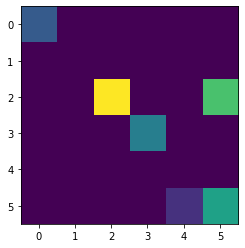

In [124]:
#Defining grid and start & terminal positions
grid  =  np.zeros((6,6))
start_pos = [0,0]
terminal_pos = [5, 5]
grid[tuple(terminal_pos)] = 4
grid[tuple(start_pos)] = 2
agent_pos = [0,0]
reward_pos_1 = [5,4]
reward_pos_2 = [3,3]
reward_pos_3 = [2,5]
reward_pos_4 = [2,2]
grid[tuple(reward_pos_1)] = 1
grid[tuple(reward_pos_2)] = 3
grid[tuple(reward_pos_3)] = 5
grid[tuple(reward_pos_4)] = 7
plt.imshow(grid)

In [125]:
#Creating class 
class Gridworld (gym.Env):
  def __init__(self):
    self.action_space = spaces.Discrete(4)
    self.observation_space = spaces.Discrete(36)
    self.max_timesteps = 50
    self.agent_pos = [0,0]
    self.start_pos = [0,0]
    self.terminal_pos = [5,5]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,5]
    self.reward_pos_4 = [2,2]
    self.reward = 0

  def step(self, action):
#Defining all the possible actions
    self.reward = 0
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    if action == 4:
      self.agent_pos[1] += 1 
      self.agent_pos[0] += 1
    self.agent_pos = np.clip(self.agent_pos, 0, 5) 
    self.state = np.zeros((6,6))
#Defining the start and end positions for agent along with reward and penalty positions
#Assigning colors to agent position, terminal position, rewards and penalties
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5 
    self.state[tuple(self.reward_pos_1)] = 0.2
    self.state[tuple(self.reward_pos_2)] = 0.3
    self.state[tuple(self.reward_pos_3)] = 0.4
    self.state[tuple(self.reward_pos_4)] = 0.7
    self.terminal_pos = [5,5]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,5]
    self.reward_pos_4 = [2,2]
#Putting on the condition of number of time-steps on all the rewards and defining the reward values
    if (self.agent_pos == [2,2]).all():
      if (self.timesteps <= 15):
        self.reward = 25
    if (self.agent_pos == [5,4]).all():
      if (self.timesteps <= 15):
        self.reward = 15
    if (self.agent_pos == [3,3]).all():
      if (self.timesteps  <= 15):
        self.reward = 35
    if (self.agent_pos == np.array([2,5])).all():
      if (self.timesteps <= 15):
        self.reward = 10
#Defining and assigning terminal state reward   
    if (self.agent_pos == self.terminal_pos).all():
      if (self.timesteps  <= 20):
        self.reward = 45
      self.count += 1
#Defined the logic for movement of criminals with 20% chance of moving
    if (self.count % 3 == 0):
      prob_move = np.random.uniform(0,1)
      chance_move =  np.random.uniform(0,1)
      if chance_move > 0.7 :
        if prob_move > 0.5 :
          self.reward_pos_1[0] -= 1
        else :
          self.reward_pos_1[1] -= 1
    if (self.count % 2 == 0):
      prob_move = np.random.uniform(0,1)
      chance_move =  np.random.uniform(0,1)
      if chance_move > 0.7 :
        if prob_move > 0.5 :
          self.reward_pos_2[0] -= 1
        else :
          self.reward_pos_2[0] += 1
    return self.reward,self.agent_pos,self.count

  def render(self):
    plt.imshow(self.state)
  def reset(self):
    self.timesteps = 0
    self.agent_pos = [0, 0]
    self.terminal_pos = [5,5]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,5]
    self.reward_pos_4 = [2,2]
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5 
    self.state[tuple(self.reward_pos_1)] = 0.2
    self.state[tuple(self.reward_pos_2)] = 0.3
    self.state[tuple(self.reward_pos_3)] = 0.4
    self.state[tuple(self.reward_pos_4)] = 0.7
    observation = self.state.flatten()
    self.reward = 0
    self.count = 0
    self.trap = 0

    return observation




In [130]:
np.random.seed(100)
def Episodes_Q():
  env = Gridworld()
  obs = env.reset()
  episode = {}
  episode[0] = [([0,0],0)]
  start_pos = [0,0]
  for i in range(1):   
     x = (start_pos == env.terminal_pos)
     while x == False :
        env.reward  = 0
        action = np.random.randint(0,5)
        reward,position,c  = env.step(action)
        position = np.clip(position, 0, 5)
        episode[0].append((position,reward))
        if (position == env.terminal_pos).all():
          x = True
          break
        
  return episode
def Possible_Actions(current_s):
    next_states = []
    org_value = list(current_s)
    org_value[0] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[0] -= 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[1] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[1] -= 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[0] += 1
    org_value[1] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    return next_states
def start_q_values():
      final_q_table = {}
      for i in range(6):
          for j in range(6):
              final_q_table[(i,j)] = np.zeros(5)
      return final_q_table


def Q_learning():
  plot_reward = []
  epsilon = []
  e = 0.2
  q_store = start_q_values()
  for i in range(2000):
      for_graph = 0
      episode = Episodes_Q()
      e = e * 0.999
      for i in range(len(episode[0])-1):
            threshold = np.random.uniform(0,1)
            expected_transitions = Possible_Actions(list(episode[0][i][0]))
            action = expected_transitions.index(list(episode[0][i+1][0]))
            old_value_q = q_store.get((tuple(episode[0][i][0])))[action]
            if threshold > e:
                maximum_of_q_new = max(q_store.get(tuple(episode[0][i+1][0])))
            else:
                maximum_of_q_new = np.random.choice(q_store.get(tuple(episode[0][i+1][0])))
            latest_reward = episode[0][i+1][1]
            for_graph += latest_reward
            alpha = 0.15
            gamma = 0.7
            new_value_q = old_value_q + alpha*(latest_reward + gamma*(maximum_of_q_new) - old_value_q )
            q_store[tuple(episode[0][i][0])][action] = new_value_q
      plot_reward.append(for_graph)
      epsilon.append(e)
  return q_store, plot_reward, epsilon
        
finaltable, reward_graph, decay = Q_learning()   
optimal = finaltable.values()
def get_max():
   action = []
   state = []
   for item in finaltable.items():
       action.append(tuple(item[1]).index(max(tuple(item[1]))))
   return action

optimal_action = get_max()
print(optimal_action)





[4, 0, 0, 0, 0, 0, 2, 4, 0, 0, 3, 0, 2, 2, 4, 3, 3, 3, 2, 1, 1, 1, 3, 3, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0]


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

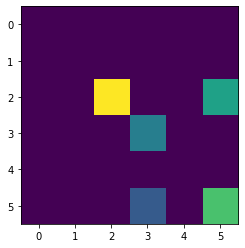

<IPython.core.display.Javascript object>

15
60


In [131]:
env = Gridworld()
obs = env.reset()
cumulative = 0
from google.colab import widgets
output_grid = widgets.Grid(1,1)
for i in range(len(optimal_action)):
  action = optimal_action[i]
  grid = np.zeros((6,6))
  reward_optimal,position,count  = env.step(action)
  cumulative += reward_optimal
  env.timesteps += 1
  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    env.render()
  time.sleep(0.5)
  if (position == terminal_pos).all():
    break 
print(env.timesteps)
print(cumulative)

[75, 130, 85, 105, 45, 100, 75, 295, 70, 225, 90, 80, 155, 230, 180, 80, 115, 175, 45, 45, 95, 70, 60, 65, 105, 90, 65, 125, 60, 70, 170, 155, 150, 60, 75, 140, 150, 95, 95, 195, 75, 250, 265, 215, 250, 75, 170, 55, 165, 145, 60, 115, 55, 195, 70, 85, 105, 135, 205, 80, 150, 45, 245, 80, 120, 110, 100, 170, 130, 60, 75, 110, 60, 265, 75, 110, 180, 75, 75, 175, 125, 170, 160, 90, 165, 110, 135, 260, 45, 155, 370, 205, 80, 60, 115, 100, 55, 70, 85, 80, 105, 100, 105, 105, 115, 60, 120, 80, 140, 45, 100, 75, 145, 105, 155, 115, 75, 170, 90, 160, 110, 90, 85, 225, 45, 130, 135, 125, 105, 115, 80, 165, 160, 150, 115, 95, 60, 190, 90, 185, 125, 115, 185, 220, 60, 80, 160, 45, 170, 45, 170, 345, 215, 135, 145, 155, 45, 275, 75, 105, 45, 130, 80, 125, 120, 60, 105, 55, 60, 235, 195, 95, 170, 285, 60, 55, 300, 115, 65, 110, 90, 220, 105, 120, 70, 180, 135, 100, 160, 90, 125, 115, 75, 90, 90, 80, 95, 45, 120, 160, 95, 85, 255, 60, 165, 195, 55, 125, 130, 295, 45, 80, 55, 80, 140, 55, 140, 120, 1

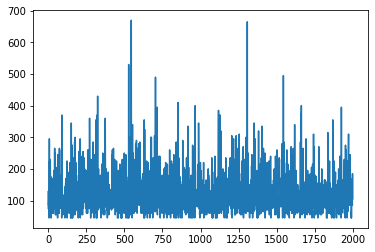

In [132]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(2000), reward_graph)
print(reward_graph)


[0.1998, 0.1996002, 0.1994005998, 0.1992011992002, 0.1990019980009998, 0.1988029960029988, 0.1986041930069958, 0.19840558881398881, 0.19820718322517483, 0.19800897604194967, 0.19781096706590773, 0.1976131560988418, 0.19741554294274297, 0.1972181273998002, 0.1970209092724004, 0.196823888363128, 0.19662706447476488, 0.19643043741029012, 0.19623400697287982, 0.19603777296590694, 0.19584173519294104, 0.1956458934577481, 0.19545024756429036, 0.19525479731672607, 0.19505954251940935, 0.19486448297688994, 0.19466961849391304, 0.19447494887541913, 0.1942804739265437, 0.19408619345261716, 0.19389210725916453, 0.19369821515190536, 0.19350451693675344, 0.19331101241981669, 0.19311770140739687, 0.19292458370598947, 0.1927316591222835, 0.1925389274631612, 0.19234638853569805, 0.19215404214716236, 0.1919618881050152, 0.19176992621691016, 0.19157815629069325, 0.19138657813440255, 0.19119519155626816, 0.19100399636471188, 0.19081299236834717, 0.19062217937597883, 0.19043155719660285, 0.190241125639406

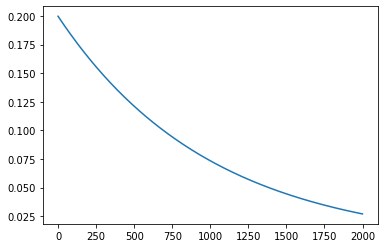

In [133]:
plt.plot(range(2000), decay)
print(decay)